In [1]:
# Install TensorFlow
# !pip install -q tensorflow

try:
  %tensorflow_version 2.x  # Colab only.
except Exception:
  pass

import tensorflow as tf
print(tf.__version__)

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.x  # Colab only.`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.
2.2.0


In [0]:
# More imports
from tensorflow.keras.layers import Input, Dense, Embedding, Flatten, \
  Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load Data

In [3]:
# data is from: https://grouplens.org/datasets/movielens/
# in case the link changes in the future

!wget -nc http://files.grouplens.org/datasets/movielens/ml-20m.zip

File ‘ml-20m.zip’ already there; not retrieving.



In [4]:
!unzip -n ml-20m.zip

Archive:  ml-20m.zip


In [0]:
df = pd.read_csv('ml-20m/ratings.csv')

In [6]:
df.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


In [7]:
df.userId

0                1
1                1
2                1
3                1
4                1
             ...  
20000258    138493
20000259    138493
20000260    138493
20000261    138493
20000262    138493
Name: userId, Length: 20000263, dtype: int64

# Data Preprocessing

In [0]:
# Create user ids from 0 to len(users)
df.userId = pd.Categorical(df.userId) # Cast userId column into categorical - assigns integer encodings from 0 to each userId
df['new_user_id'] = df.userId.cat.codes # Assign these codes to a new column

In [0]:
# Create movie ids from 0 to len(movies)
df.movieId = pd.Categorical(df.movieId)
df['new_movie_id'] = df.movieId.cat.codes

In [0]:
# Extract ids and ratings as arrays
user_ids = df['new_user_id'].values
movie_ids = df['new_movie_id'].values
ratings = df['rating'].values

In [0]:
# Number of users and movies
N = len(set(user_ids))
M = len(set(movie_ids))

# Embedding dimension
K = 12

# Train Test Split

In [0]:
#print(df.columns)
X = np.array([user_ids, movie_ids]).T # Reshape data to be N x 2
y = ratings

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42) 

## Normalize

In [0]:
scaler = StandardScaler(with_std=False)
y_train_scaled = scaler.fit_transform(y_train.reshape(-1,1)) # Scaler needs N x 1 numpy array
y_test_scaled = scaler.transform(y_test.reshape(-1,1)) # Scaler needs N x 1 numpy array

## Reshape Data

In [15]:
# Reshape the data because we are passing in 2 different inputs
#X_train_reshaped = list([X_train_user, X_train_movie])
X_train_reshaped = list(X_train.T)
print(X_train_reshaped)
# X_test_reshaped = list([X_test_user, X_test_movie])
X_test_reshaped = list(X_test.T)
print(X_test_reshaped)

[array([ 50068,  97442,   3742, ...,  15190,  92010, 111372], dtype=int32), array([ 315, 1062,  765, ..., 2631, 1248, 2555], dtype=int32)]
[array([122269,  49017,  89526, ...,  14150,  81452,  54738], dtype=int32), array([ 7761,    31, 22764, ...,    40,  2585,    16], dtype=int32)]


# Build Model

In [0]:
u = Input(shape=(1,))

m = Input(shape=(1,))

u_emb = Embedding(N, K)(u) # Output Dimensions = num_samples x T x K = num_samples x 1 x K

m_emb = Embedding(M, K)(m) # Output Dimensions = num_samples x T x K = num_samples x 1

u_emb = Flatten()(u_emb) # Output Dimensions = num_samples x K

m_emb = Flatten()(m_emb) # Output Dimensions = num_samples x K

x = Concatenate()([u_emb, m_emb]) # Output Dimensions = num_samples x 2K

x = Dense(512, activation='relu')(x)
x = Dense(512, activation='relu')(x)
x = Dense(1)(x)

model = Model(inputs = [u, m], outputs=x)

model.compile(optimizer=SGD(lr=0.1, momentum=0.9),
              loss = 'mse',
              metrics=['accuracy']
              )

In [17]:
print(model.summary())

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 1, 12)        1661916     input_1[0][0]                    
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 1, 12)        320928      input_2[0][0]                    
______________________________________________________________________________________________

In [18]:
r = model.fit(x=X_train_reshaped, y=y_train_scaled,
              validation_data = (X_test_reshaped, y_test_scaled),
              epochs = 25,
              batch_size = 1024,
              verbose = 2)

Epoch 1/25
15626/15626 - 83s - loss: 0.7736 - accuracy: 0.0000e+00 - val_loss: 0.7170 - val_accuracy: 0.0000e+00
Epoch 2/25
15626/15626 - 82s - loss: 0.6995 - accuracy: 0.0000e+00 - val_loss: 0.6968 - val_accuracy: 0.0000e+00
Epoch 3/25
15626/15626 - 81s - loss: 0.6760 - accuracy: 0.0000e+00 - val_loss: 0.6842 - val_accuracy: 0.0000e+00
Epoch 4/25
15626/15626 - 80s - loss: 0.6597 - accuracy: 0.0000e+00 - val_loss: 0.6815 - val_accuracy: 0.0000e+00
Epoch 5/25
15626/15626 - 80s - loss: 0.6457 - accuracy: 0.0000e+00 - val_loss: 0.6630 - val_accuracy: 0.0000e+00
Epoch 6/25
15626/15626 - 80s - loss: 0.6299 - accuracy: 0.0000e+00 - val_loss: 0.6525 - val_accuracy: 0.0000e+00
Epoch 7/25
15626/15626 - 80s - loss: 0.6134 - accuracy: 0.0000e+00 - val_loss: 0.6437 - val_accuracy: 0.0000e+00
Epoch 8/25
15626/15626 - 80s - loss: 0.6005 - accuracy: 0.0000e+00 - val_loss: 0.6406 - val_accuracy: 0.0000e+00
Epoch 9/25
15626/15626 - 80s - loss: 0.5893 - accuracy: 0.0000e+00 - val_loss: 0.6366 - val_accu

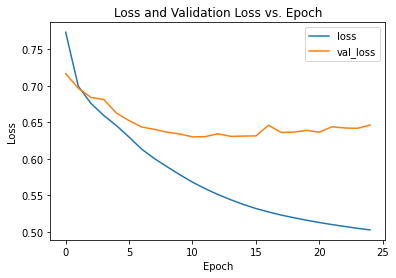

In [19]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.title("Loss and Validation Loss vs. Epoch")
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

In [20]:
# is this on par with other approaches?
# https://datascience.stackexchange.com/questions/29740/benchmark-result-for-movielens-dataset
np.sqrt(0.6259)

0.7911384202527394